
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Practice Session - 02  </font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


================================================================================================================

# Today's session agenda:
1. **Get familiar with the graphs and how to work with them;**
2. **Analyse the data about media companies. Figure out their connections;**
3. **Learn about various way of displaying statistic on the graphs**


# Install python and Jupyter notebook (Windows)

* Python: https://youtu.be/UvcQlPZ8ecA
* Jupyter notebook: https://youtu.be/pmreXCM2Z9A

# Libraries needed:

**We need following libraries: igraph**


In [ ]:
#Libraries needed for igraph plot fuction to work properly in colab (Thanks to Joonas Ariva)
!pip install python-igraph==0.8.3
#!apt install libcairo2-dev pkg-config python3-dev
#!pip install python-igraph leidenalg cairocffi

In [ ]:
!apt install libcairo2-dev pkg-config python3-dev

In [ ]:
!pip install python-igraph leidenalg cairocffi

In [1]:
# Installing and importing igraph library
#!pip install python-igraph
import igraph as ig

The above statement import the 'igraph' library in the current namespace, but rather than using the name igraph, we will refer it as 'ig'.

In [2]:
#Check its version
print(ig.__version__)

0.11.4


# Creating a sample graph from scratch

In [3]:
g = ig.Graph()

The above statement created an undirected graph with no vertices or edges and assigned it to the variable g. We called igraph inbuild class Graph() to build graph g. To confirm that it’s really an igraph graph, we can print it:

In [4]:
g

This tells us that g is an instance of igraph’s Graph class and that it is currently living at the memory address 0x1e46e216040 (the exact output will almost surely be different for your platform). To obtain a more user-friendly output, we can try to print the graph using Python’s print statement:

In [5]:
print(g)

IGRAPH U--- 0 0 --


Above we can find some important information about the graph:

* Four character long code, where 'U' means undirected graph
* First number - the number of nodes
* Second number - the number of edges in the graph

In [6]:
# Let's add some vertices
g.add_vertices(3)
#0, 1, 2

The above statement access the add_vertices() method of the Graph class using the same class object g, and it adds the given number of vertices to the graph.

In [7]:
print(g)

IGRAPH U--- 3 0 --


Now our graph has three vertices but no edges. Let’s add some edges as well! We can add edges by calling add_edges() method of the Graph class using the object g - but in order to add edges, we have to refer to existing vertices somehow. igraph uses integer vertex IDs starting from zero, thus the first vertex of your graph has index zero, the second vertex has index 1 and so on. Edges are specified by pairs of integers, so [(0,1), (1,2)] denotes a list of two edges: one between the first and the second, and the other one between the second and the third vertices of the graph. Passing this list to add_edges() method adds these two edges to our graph:

In [8]:
g.add_edges([(0,1), (1,2)])

In [9]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


Above we can find some important information about the graph:

* Four character long code, where 'U' means undirected graph
* First number - the number of nodes
* Second number - the number of edges in the graph
* List of edges

In [10]:
#Let's try to add edges to invalid ID vetices
g.add_edges((5, 0))

TypeError: iterable must return pairs of integers or strings

Most igraph functions will raise an igraph.core.InternalError if something goes wrong. The message corresponding to the exception gives you a short textual explanation of what went wrong (cannot add edges, invalid vertex id) along with the corresponding line in the C source where the error occurred.

In [11]:
#Let us go on with our graph g and add some more vertices and edges to it:
g.add_edges([(2, 0)])
g.add_vertices(3)
#0,1,2,3,4,5
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


Note: Edges also have IDs, similarly to vertices; they also start from zero and edges that were added later have higher IDs than edges that were added earlier. Vertex and edge IDs are always continuous, and a direct consequence of this fact is that if we happen to delete an edge, chances are that some (or all) of the edges will be renumbered. Moreover, if we| delete a vertex, even the vertex IDs will change.

In [12]:
#get edge ID using get_id method
g.get_eid(2, 3)

3

Edges can be deleted by delete_edges() method and it requires a list of edge IDs to be deleted (or a single edge ID). Vertices can be deleted by delete_vertices() and it requires a list of vertex IDs to be deleted (or a single vertex ID).

In [13]:
#delete edge ID 3
g.delete_edges(3)
print(g)

IGRAPH U--- 6 6 --
+ edges:
0--1 1--2 0--2 3--4 4--5 3--5


In [14]:
#Let's visualize our graph g
ig.plot(g,bbox=(200,200))

AttributeError: Plotting not available; please install pycairo or cairocffi

# Creating networks

In [15]:
# Let’s create an undirected graph with 3 edges.
g1 = ig.Graph(edges=[(0,1), (1,2), (2, 0)], n=3, directed=False)
#0,1,2
print(g1)
ig.plot(g1,bbox=(200,200))

IGRAPH U--- 3 3 --
+ edges:
0--1 1--2 0--2


AttributeError: Plotting not available; please install pycairo or cairocffi

On the plot above we have 3 nodes (0,1,2) and undirected edges that connect nodes next way: 0--1, 1--2, 2--0.

In [16]:
#save graph as png
ig.plot(g1,"g1.png", bbox=(300,300))

AttributeError: Plotting not available; please install pycairo or cairocffi

In [17]:
#Now let us create another graph:
g2 = ig.Graph(edges=[(0,1), (1,2), (2,0), (3,4), (7,4), (3,6), (1,5)], n=8)
print(g2)

IGRAPH U--- 8 7 --
+ edges:
0--1 1--2 0--2 3--4 4--7 3--6 1--5


In [18]:
ig.plot(g2, bbox=(200,200))

AttributeError: Plotting not available; please install pycairo or cairocffi

Above is an example of disconnected graph.

Having no names of the nodes gives limited information, so let us name them:

In [19]:
g3 = ig.Graph(edges=[(0,1), (1,2), (2, 0)], n=3, directed=False)
ig.plot(g3, bbox=(200,200), vertex_label=["Jim", "John", "Jill"])

AttributeError: Plotting not available; please install pycairo or cairocffi

# Edge, vertex, and network attributes

### Let us assume that our graph is a social network where vertices represent people and edges represent social connections between them.

In [20]:
#Let us create a simple imaginary social network
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

Now, let us assume that we want to store the names, ages and genders of people in this network as vertex attributes, and for every connection, we want to store whether this is an informal friendship tie or a formal tie. Every Graph object contains two special members called vs and es, standing for the sequence of all vertices and all edges, respectively. If you try to use vs or es as a Python dictionary, you will manipulate the attribute storage area of the graph:

In [21]:
g.vs

In [22]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [23]:
print(g)

IGRAPH UN-- 7 9 --
+ attr: age (v), gender (v), name (v), is_formal (e)
+ edges (vertex names):
 Alice -- Bob, Claire, Frank             Esther -- Claire, Dennis
   Bob -- Alice                           Frank -- Alice, Claire, George
Claire -- Alice, Dennis, Esther, Frank   George -- Dennis, Frank
Dennis -- Claire, Esther, George


Now we can see some additional information in summary:

* D or U, for a directed or undirected graph
* N for a named graph (where nodes have a name attribute)
* W for a weighted graph (where edges have a weight attribute)
* B for a bipartite (two-mode) graph (where nodes have a type attribute)

The two numbers that follow (7 9) refer to the number of nodes and edges in the graph. The description also lists node & edge attributes, for example:

* (g/c) - graph-level character attribute
* (v/c) - vertex-level character attribute
* (e/n) - edge-level numeric attribute

In [24]:
#Change attribute value at specific index
g.es[0]

igraph.Edge(<igraph.Graph object at 0x000001F27FF3A640>, 0, {'is_formal': False})

In [25]:
g.vs[0].attributes()

{'name': 'Alice', 'age': 25, 'gender': 'f'}

In [26]:
g.es[0]["is_formal"] = True
g.es[0]

igraph.Edge(<igraph.Graph object at 0x000001F27FF3A640>, 0, {'is_formal': True})

# Graph properties

### 1. **Vertex degree:** The degree of a vertex equals the number of edges adjacent to it. In case of directed networks, we can also define in-degree (the number of edges pointing towards the vertex) and out-degree (the number of edges originating from the vertex). igraph is able to calculate all of them using a simple syntax:

In [27]:
#Undirected graph
g_undirected = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)], directed=False)
g_undirected.degree()

[3, 1, 4, 3, 2, 3, 2]

In [28]:
g_undirected.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
ig.plot(g_undirected, bbox=(200,200), vertex_label=g_undirected.vs["name"])

AttributeError: Plotting not available; please install pycairo or cairocffi

If the graph was directed, we would have been able to calculate the in- and out-degrees separately using g.degree(mode="in") and g.degree(mode="out").

In [29]:
#Directed graph
g_directed = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)], directed=True)

In [30]:
g_directed.degree(mode="in")

[1, 1, 2, 2, 1, 1, 1]

In [31]:
g_directed.degree(mode="out")

[2, 0, 2, 1, 1, 2, 1]

In [32]:
g_directed.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
ig.plot(g_directed, bbox=(200,200), vertex_label=g_directed.vs["name"])

AttributeError: Plotting not available; please install pycairo or cairocffi

In [33]:
print(g_directed)

IGRAPH DN-- 7 9 --
+ attr: name (v)
+ edges (vertex names):
Alice->Bob, Alice->Claire, Claire->Dennis, Dennis->Esther, Esther->Claire,
Claire->Frank, Frank->Alice, George->Dennis, Frank->George


In [34]:
print(g_undirected)

IGRAPH UN-- 7 9 --
+ attr: name (v)
+ edges (vertex names):
 Alice -- Bob, Claire, Frank             Esther -- Claire, Dennis
   Bob -- Alice                           Frank -- Alice, Claire, George
Claire -- Alice, Dennis, Esther, Frank   George -- Dennis, Frank
Dennis -- Claire, Esther, George


### 2. **Edge list:** An edge list is a data structure used to represent a graph as a list of its edges. An edge is defined by its start and end vertex, so each edge may be represented by two numbers. The entire edge list may be represented as a two-column matrix. igraph is able to calculate it using a simple syntax:

In [35]:
print(g_directed.get_edgelist())

[(0, 1), (0, 2), (2, 3), (3, 4), (4, 2), (2, 5), (5, 0), (6, 3), (5, 6)]


### 3. **Adjacency matrix:** An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. igraph is able to calculate it using a simple syntax:

In [36]:
print(g_directed.get_adjacency())

[[0, 1, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 1, 0, 0]
 [0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 1, 0, 0, 0]]


In [37]:
from IPython.display import Image
Image("adjacency_matrix.png")

FileNotFoundError: No such file or directory: 'adjacency_matrix.png'

FileNotFoundError: No such file or directory: 'adjacency_matrix.png'

<IPython.core.display.Image object>

<h2><center> <font color='black'> Adjacency matrix example</font></center></h3>

### 4. **Adjacency list:** An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. igraph is able to calculate it using a simple syntax:

In [38]:
from IPython.display import Image
Image("adjaccency_list.jpg")

FileNotFoundError: No such file or directory: 'adjaccency_list.jpg'

FileNotFoundError: No such file or directory: 'adjaccency_list.jpg'

<IPython.core.display.Image object>

# Network Analysis

As we learned basic functions to work with graphs, now we will apply them to use in practice. To be more precise, we will study a dataset to understand how different media organizations are related with each other. That would let us know, which marketing channel is better to use to do advertising.

We will start by loading the data:

In [39]:
import pandas as pd
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')

In [40]:
nodes.head(17)

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20
5,s06,New York Post,1,Newspaper,50
6,s07,CNN,2,TV,56
7,s08,MSNBC,2,TV,34
8,s09,FOX News,2,TV,60
9,s10,ABC,2,TV,23


In [41]:
nodes.shape

(17, 5)

In [42]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             17 non-null     object
 1   media          17 non-null     object
 2   media.type     17 non-null     int64 
 3   type.label     17 non-null     object
 4   audience.size  17 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 808.0+ bytes


In [43]:
edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [44]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    51 non-null     object
 1   to      51 non-null     object
 2   weight  51 non-null     int64 
 3   type    51 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [45]:
g = ig.Graph.TupleList(edges.values,directed=True,
                       edge_attrs=edges.columns[2:])

In [48]:
edges.columns[2:]

Index(['weight', 'type'], dtype='object')

In [49]:
edges.values

array([['s01', 's02', 10, 'hyperlink'],
       ['s01', 's02', 12, 'hyperlink'],
       ['s01', 's03', 22, 'hyperlink'],
       ['s01', 's04', 21, 'hyperlink'],
       ['s04', 's11', 22, 'mention'],
       ['s05', 's15', 21, 'mention'],
       ['s06', 's17', 21, 'mention'],
       ['s08', 's09', 11, 'mention'],
       ['s08', 's09', 12, 'mention'],
       ['s03', 's04', 22, 'hyperlink'],
       ['s04', 's03', 23, 'hyperlink'],
       ['s01', 's15', 20, 'mention'],
       ['s15', 's01', 11, 'hyperlink'],
       ['s15', 's01', 11, 'hyperlink'],
       ['s16', 's17', 21, 'mention'],
       ['s16', 's06', 23, 'hyperlink'],
       ['s06', 's16', 21, 'hyperlink'],
       ['s09', 's10', 21, 'mention'],
       ['s08', 's07', 21, 'mention'],
       ['s07', 's08', 22, 'mention'],
       ['s07', 's10', 21, 'hyperlink'],
       ['s05', 's02', 21, 'hyperlink'],
       ['s02', 's03', 21, 'hyperlink'],
       ['s02', 's01', 23, 'hyperlink'],
       ['s03', 's01', 21, 'hyperlink'],
       ['s12', 's13'

In [46]:
print(g)

IGRAPH DNW- 17 51 --
+ attr: name (v), type (e), weight (e)
+ edges (vertex names):
s01 -> s02, s02, s03, s04, s15             s09 -> s10
s02 -> s01, s03, s09, s10                  s16 -> s06, s17
s03 -> s01, s04, s11, s05, s08, s10, s12   s10 -> s03
s04 -> s03, s11, s06, s17, s12             s07 -> s03, s08, s10, s14
s11 ->                                     s12 -> s06, s13, s14
s05 -> s01, s02, s15, s09                  s13 -> s17, s12
s15 -> s01, s01, s04, s06                  s14 -> s11, s13
s06 -> s17, s16
s17 -> s04
s08 -> s03, s09, s09, s07


In [47]:
nodes_df = nodes.set_index(['id'])
for column in nodes_df:
    g.vs[column] = nodes_df.loc[g.vs['name'],column]

In [ ]:
nodes.set_index(['id'])

,media,media.type,type.label,audience.size
id,,,,
s01,NY Times,1,Newspaper,20
s02,Washington Post,1,Newspaper,25
s03,Wall Street Journal,1,Newspaper,30
s04,USA Today,1,Newspaper,32
s05,LA Times,1,Newspaper,20
s06,New York Post,1,Newspaper,50
s07,CNN,2,TV,56
s08,MSNBC,2,TV,34
s09,FOX News,2,TV,60


In [ ]:
nodes_df = nodes.set_index(['id'])
nodes_df.head(3)

,media,media.type,type.label,audience.size
id,,,,
s01,NY Times,1,Newspaper,20
s02,Washington Post,1,Newspaper,25
s03,Wall Street Journal,1,Newspaper,30


In [ ]:
print(g)

IGRAPH DNW- 17 51 --
+ attr: audience.size (v), media (v), media.type (v), name (v), type.label
  (v), type (e), weight (e)
+ edges (vertex names):
s01 -> s02, s02, s03, s04, s15             s09 -> s10
s02 -> s01, s03, s09, s10                  s16 -> s06, s17
s03 -> s01, s04, s11, s05, s08, s10, s12   s10 -> s03
s04 -> s03, s11, s06, s17, s12             s07 -> s03, s08, s10, s14
s11 ->                                     s12 -> s06, s13, s14
s05 -> s01, s02, s15, s09                  s13 -> s17, s12
s15 -> s01, s01, s04, s06                  s14 -> s11, s13
s06 -> s17, s16
s17 -> s04
s08 -> s03, s09, s09, s07


In [ ]:
G = ig.Graph.DictList(
          vertices=nodes.to_dict('records'),
          edges=edges.to_dict('records'),
          directed=True,
          vertex_name_attr='id',
          edge_foreign_keys=('from', 'to'));

In [ ]:
print(G)

IGRAPH D-W- 17 51 --
+ attr: audience.size (v), id (v), media (v), media.type (v), type.label (v),
  from (e), to (e), type (e), weight (e)
+ edges:
 0 ->  1  1  2  3 14          7 ->  2  6  8  8            14 ->  0  0  3  5
 1 ->  0  2  8  9             8 ->  9                     15 ->  5 16
 2 ->  0  3  4  7  9 10 11    9 ->  2                     16 ->  3
 3 ->  2  5 10 11 16         10 ->
 4 ->  0  1  8 14            11 ->  5 12 13
 5 -> 15 16                  12 -> 11 16
 6 ->  2  7  9 13            13 -> 10 12


### Exercise 1:Sanity checks to clean edge dataset

In [ ]:
# Sanity checks to clean edge dataset
'''
# Todo
1. Number of nodes in the 'InputFileNodes.csv' data. #nodes.shape[0]
2. Number of unique nodes in the 'InputFileNodes.csv' data. #nodes['columnname'].nunique()
3. Number of rows in the 'InputFileEdges.csv' data.
4. Number of unique edges (from, to) in the 'InputFileEdges.csv' data. #edges['columnnames'].nunique()
'''

print('Please try to do the four mentioned questions.')

Please try to do the four mentioned questions.


As you can see, total amount of edges is bigger then unique edges with combination (from,to). This shows us that there are nodes with two or more edges.

We will collapse all links of the same type between the same two nodes by summing their weights:

In [ ]:
links = edges.groupby(['from', 'to', 'type'])['weight'].sum().reset_index()
print(edges.shape,'\n',links.shape)

(51, 4) 
 (48, 4)


In [ ]:
g = ig.Graph.TupleList(links.values,directed=True,
                       edge_attrs=links.columns[2:])

for column in nodes_df:
    g.vs[column] = nodes_df.loc[g.vs['name'],column]

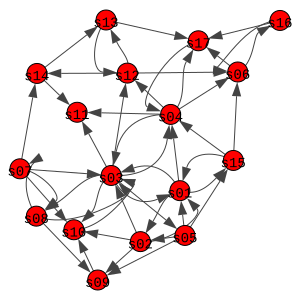

In [ ]:
ig.plot(g, "Graph.png", bbox=(300,300), vertex_label=g.vs["name"])

# Layouts and plotting

In [ ]:
layout1 = g.layout_kamada_kawai()
#or
layout1 = g.layout("kk")

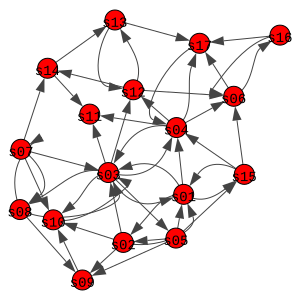

In [ ]:
ig.plot(g, bbox=(300,300), vertex_label=g.vs["name"], layout=layout1)

In [ ]:
print(g)

IGRAPH DNW- 17 48 --
+ attr: audience.size (v), media (v), media.type (v), name (v), type.label
  (v), type (e), weight (e)
+ edges (vertex names):
s01 -> s02, s03, s04, s15                  s12 -> s06, s14, s13
s02 -> s01, s03, s09, s10                  s06 -> s17, s16
s03 -> s01, s04, s10, s05, s08, s11, s12   s17 -> s04
s04 -> s03, s11, s12, s06, s17             s16 -> s06, s17
s15 -> s01, s04, s06                       s07 -> s03, s10, s08, s14
s09 -> s10                                 s14 -> s11, s13
s10 -> s03                                 s13 -> s12, s17
s05 -> s01, s02, s15, s09
s08 -> s03, s09, s07
s11 ->


In [ ]:
edges['type'].unique()

array(['hyperlink', 'mention'], dtype=object)

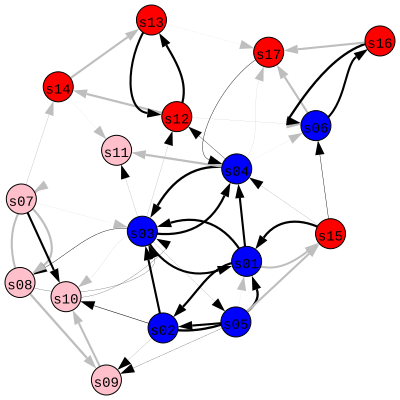

In [ ]:
vertex_type_dict = {"Newspaper": "blue", "TV": "pink", "Online": "red"}
edge_type_dict = {"hyperlink": "black", "mention": "gray"}
visual_style = {}
visual_style["vertex_size"] = 30
visual_style["vertex_color"] = [vertex_type_dict[type_label] for type_label in g.vs["type.label"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [weight/10 for weight in g.es['weight']]
visual_style["edge_color"] = [edge_type_dict[type_label] for type_label in g.es["type"]]
visual_style["layout"] = layout1
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 20
ig.plot(g, "Graph_color.png", **visual_style)